## Netflix - Data Exploration and Visualisation


![Netflix Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Netflix_2015_logo.svg/1280px-Netflix_2015_logo.svg.png)

Welcome to the Netflix Data Exploration and Visualization project! 🎉 In this repository, we delve into the world of Netflix to uncover valuable insights from their vast library of movies and TV shows. Whether you're a data enthusiast or a Netflix aficionado, this project has something for everyone.

## About Netflix 🍿

Netflix needs no introduction – it's a global powerhouse in the realm of media and video streaming. With over 10,000 movies and TV shows at your fingertips, and a staggering 222 million subscribers worldwide as of mid-2021, it's the go-to destination for binge-watching your favorite content. 

## Business Problem 📈

Our mission is crystal clear: analyze Netflix's treasure trove of data to help them make informed decisions on what types of shows and movies to produce, and how to expand their business across different countries. We're here to provide data-driven insights, not personal opinions or anecdotes.

## Dataset 📋

The dataset at the heart of this exploration includes a comprehensive listing of all the TV shows and movies available on Netflix. Here are some of the key features:

- **Show_id:** Unique ID for every movie or TV show.
- **Type:** Identifier - Is it a movie or a TV show?
- **Title:** The title of the movie or TV show.
- **Director:** The director of the movie.
- **Cast:** The talented actors involved in the movie or show.
- **Country:** The country where the movie or show was produced.
- **Date_added:** The date it was added to Netflix.
- **Release_year:** The actual release year of the movie or show.
- **Rating:** The TV rating of the movie or show.
- **Duration:** Total duration, whether in minutes or number of seasons.
- **Listed_in:** Genre.
- **Description:** A brief summary description.

### Importing Libraries and Loading the Dataset

In [2]:
# Import Relevant Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df= pd.read_csv("netflix.csv")

### Basic Data Exploration
#### 1. Feature Exploration

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In this dataset we have,

- Type identifier; Movie or Tv Show
- Titles
- Directors
- Actors
- Country where the Movie or Tv Show was produced
- Date it was added on Netflix
- Actual Release year of the Content
- Ratings
- Total Duration - in minutes or number of seasons

In [6]:
df.shape

(8807, 12)

In [8]:
# Data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We Have:
- 11 Categorical Feature
- 1 Numeric Feature

#### 2. Summary Statistics

In [9]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include='number')
# We have only 'release_year' as a numeric feature
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


Content release year analysis looks like this;

* We have content that has been the released year 1925 to 2021.
* We have the mean year 2014
* We have a standard deviation of ~8.82 and this can show us; we have release_year data spreads from 1925 to 2021, probably we have outliers mostly from 1925 to 2014

In [12]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include='object')
categorical_features.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


### Data Cleaning
1. Null Value Analysis
2. Checking Dublicate Values
3. Handling inconsistent or incorrect data

In [13]:
# Is there any null value in dataset
df.isnull().values.any()

True

In [18]:
# Which features have how much null values?
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.fillna('missing',inplace=True,axis=1)

In [22]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Null Values are removed

In [23]:
def plot_categorical_frequency(data, x_label, y_label, title):
    """Show Bar Frequency for categorical Features"""
    frequency_counts = data.value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.bar(frequency_counts.index, frequency_counts.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45) 
    plt.show()

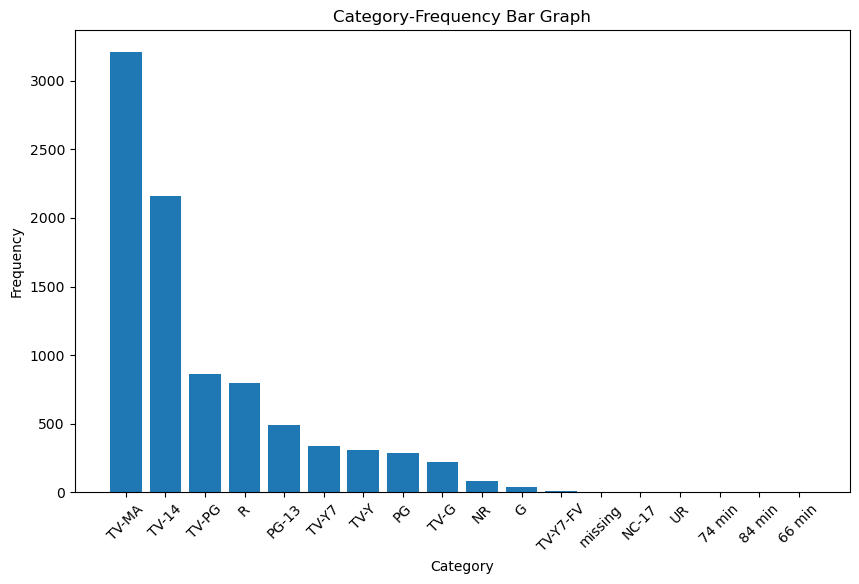

In [24]:
# 'rating' Feature
plot_categorical_frequency(df["rating"], "Category", "Frequency", "Category-Frequency Bar Graph")

with 'rating' frequency analysis we see three unwanted values entered: '74 min', '84 min', '66 min'
- We can eliminate these with turning values to 'UR'; Because UR means, Unrated
- And we can turn 'missing' values to 'UR' as well

In [25]:
# Change '74 min', '84 min', '66 min' Values to 'UR'
df['rating'] = np.where(np.isin(df['rating'], ['74 min', '84 min', '66 min', 'missing']), 'UR', df['rating'])

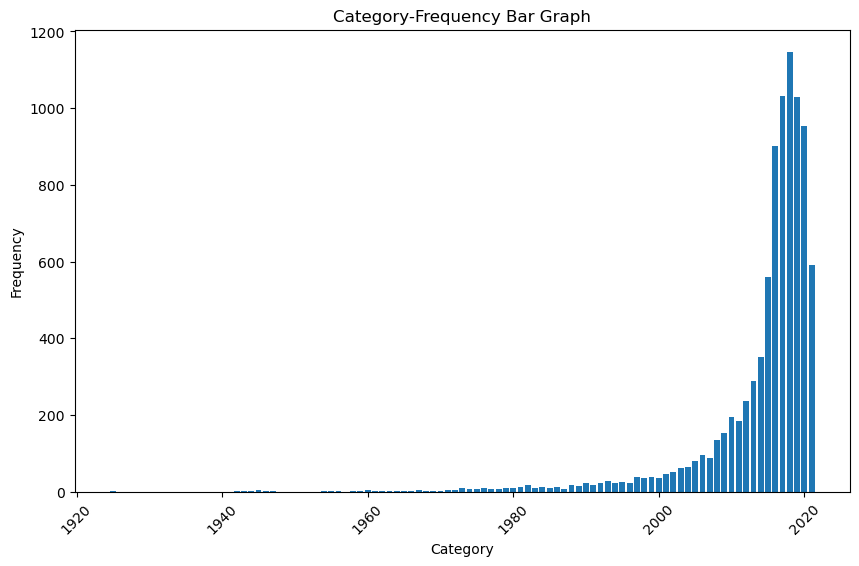

In [26]:
plot_categorical_frequency(df["release_year"], "Category", "Frequency", "Category-Frequency Bar Graph")

Seems like all of the data in release_year correct format

## EDA
### 1. Content Types

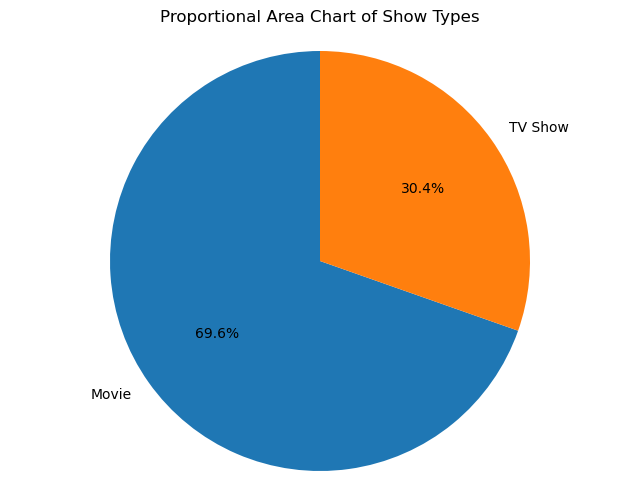

In [30]:
type_counts = df['type'].value_counts()
total_shows = type_counts.sum()

# Calculate proportions
proportions = type_counts / total_shows

# Plotting the proportional area chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportional Area Chart of Show Types')
plt.show()

In [27]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

**Observations**

We can see, Most of the content tends towards movies with 69.6% and others, TV Shows 30.4%.

### 2.Time analysis

In [31]:
# Count the occurrences of each year
year_counts = df['release_year'].value_counts().sort_index()

# Create a stacked area graph using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=year_counts.index,
    y=year_counts.values,
    mode='none',
    fill='tozeroy',
    hovertemplate='Year: %{x}<br>Count: %{y}<extra></extra>',
    name='Count'
))

# Customize the axes labels and title
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    title='Distribution of Content by Release Year'
)

# Show the stacked area graph
fig.show()

**Observations**

- Release year of contents are in mostly 2018 (1147), 2017 (1032), 2019 (1030)
- After 2010, we can see that movies or series are more concentrated.

We saw release years. But we need to look at another feature 'date_added' for understanding which year and month, and how much content was added to Netflix. Because the release of years of movies or TV Shows is different from the entrance of Netflix.


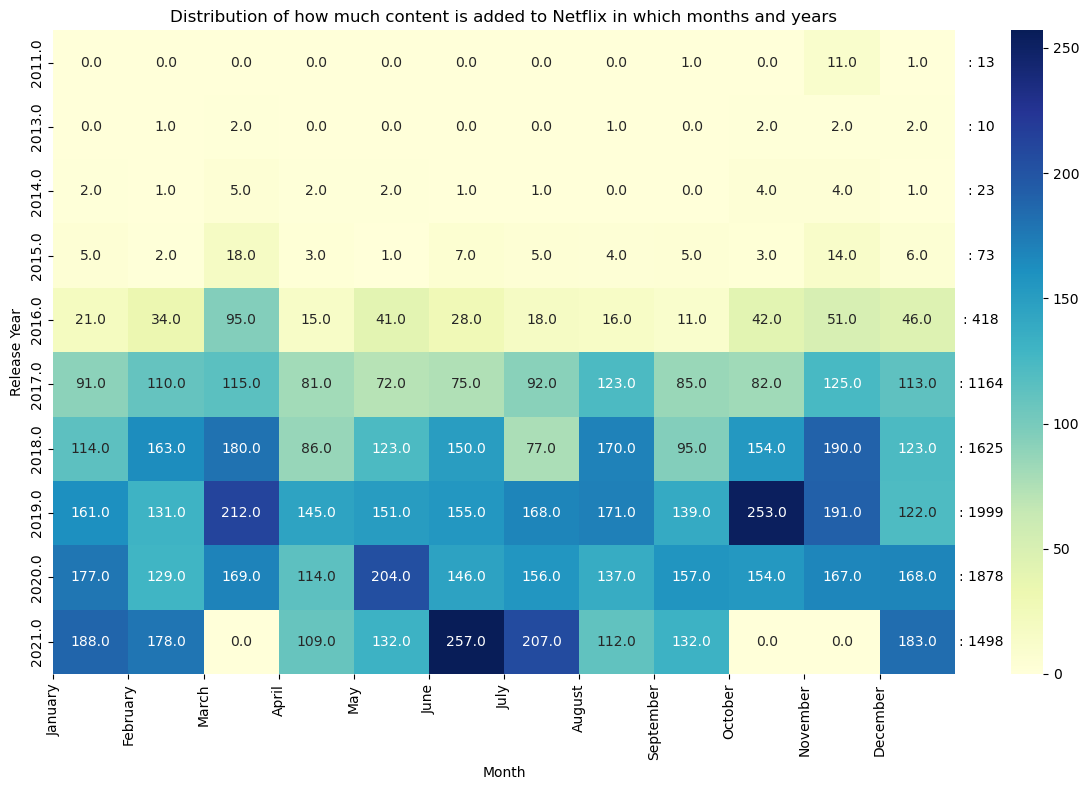

In [32]:
from datetime import datetime

# Helper function to parse date with varying formats
def parse_date(date_string):
    formats = ["%B %d, %Y", "%B %Y", "%Y"]
    for fmt in formats:
        try:
            return datetime.strptime(date_string, fmt).date()
        except ValueError:
            pass
    return None

# Filter out rows with 'missing' in the 'date_added' column
filtered_df = df[df['date_added'] != 'missing'].copy()

filtered_df['release_date'] = filtered_df['date_added'].apply(parse_date)
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])

filtered_df['release_day'] = filtered_df['release_date'].dt.day
filtered_df['release_month'] = filtered_df['release_date'].dt.month_name()
filtered_df['release_year'] = filtered_df['release_date'].dt.year

# Count the occurrences of each release year
year_counts = filtered_df['release_year'].value_counts()

# Select the years with the most movies
top_years = year_counts.head(10).index

# Filter the data for the selected years
filtered_df = filtered_df[filtered_df['release_year'].isin(top_years)].copy()

# Count the occurrences of each release year and month combination
release_counts = filtered_df.groupby(['release_year', 'release_month']).size().unstack().fillna(0)

# Create a heatmap plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(release_counts, cmap='YlGnBu', annot=True, fmt=".1f")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Release Year')
plt.title('Distribution of how much content is added to Netflix in which months and years')

# Customize x-axis tick labels to show month names
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(0, 12), labels=month_labels)

# Add total count annotations for each year below the bars
for i, year in enumerate(release_counts.index):
    plt.text(12.35, i + 0.5, f': {year_counts.loc[year]}', ha='center', va='center')

# Display the plot
plt.tight_layout()
plt.show()


**Observations**

* There are differences between the release dates of the content and the dates it was added to Netflix. For Example;
   * In 2018, 1147 content was released to the world but Netflix had 1625 content that year
   * In 2015, 560 content was released to the world but Netflix had only 73 content that year
     * We can see that most of the content released in 2016 and before has been incorporated into the following years.
* And the density of content numbers in Netflix, from which we received the data, belongs to the years 2019 and 2020

### 3. Content Numbers by Country

C:\Users\Karthik\AppData\Local\Temp\ipykernel_28604\685278530.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




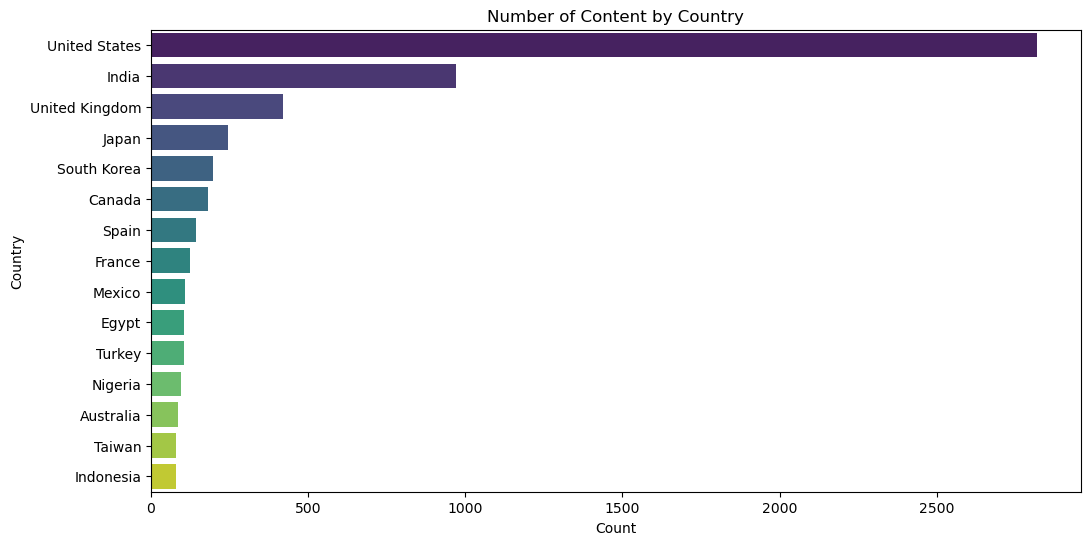

In [33]:
# Filter out rows with 'missing' in the 'country' column
filtered_df = df[df['country'] != 'missing'].copy()

# Count the occurrences of each country
country_counts = filtered_df['country'].value_counts()

# Select the top 10 countries with the most content
top_countries = country_counts.head(15)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Content by Country')

# Display the plot
plt.show()

**Observations**

*  We are seeing here, top 15 countries producing the most content
    * US, India, UK, Japan and South Korea on top

### 4. Rating analysis

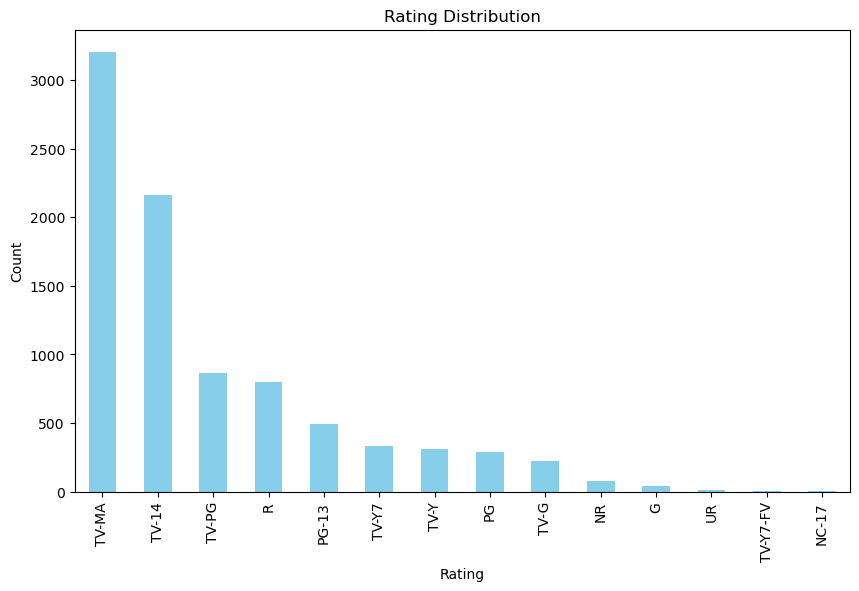

In [34]:
# Filter out rows with 'missing' in the 'rating' column
filtered_df = df[df['rating'] != 'missing'].copy()

# Count the occurrences of each rating
rating_counts = filtered_df['rating'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Display the plot
plt.show()

**Observations**

* Most used ratings TV-MA, TV-14, TV-PG is used in tv shows;
  * That means Tv shows mostly for Mature or 14+
* R rating in fourth place used in Movies;
  * That means Movies in Netflix mostly for Mature
* We can say Netflix better place for adult, and mature content

### 5. Popular Genres

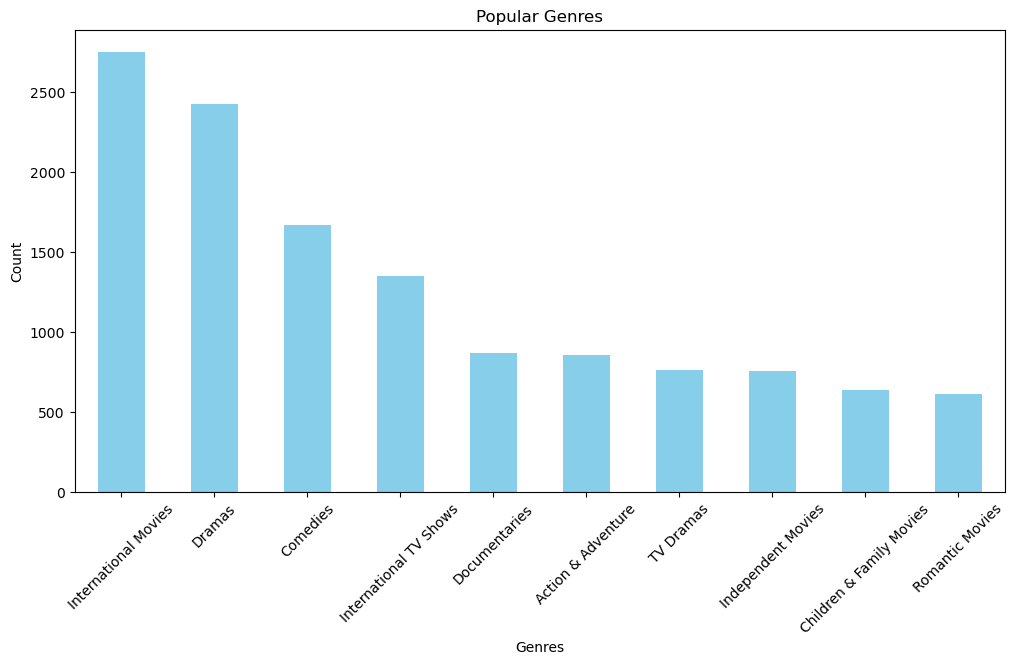

In [35]:
# Extract the genres
genres = df['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Select the top 10 popular genres
top_genres = genre_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Popular Genres')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observations**

- Most Content in Netflix;
  - International Movies, Dramas and Comedies
- There is international Movies and Tv shows in top five, and I think this is good for Netflix. We can say, Netflix has users around the world.
- If we look just regular genres; Drama is first. Because drama mostly related almost every other genre. There's not a lot movies or TV Shows pure Drama.
- Other Coming genre is Comedies, and this is I think Obvious, because reel world losing funniness. We need to laugh more.

### 5. Duration Analysis

Duration Summary Statistics:
Minimum duration: 3 min
Maximum duration: 312 min
Mean duration: 99.58 min
Median duration: 98.00 min


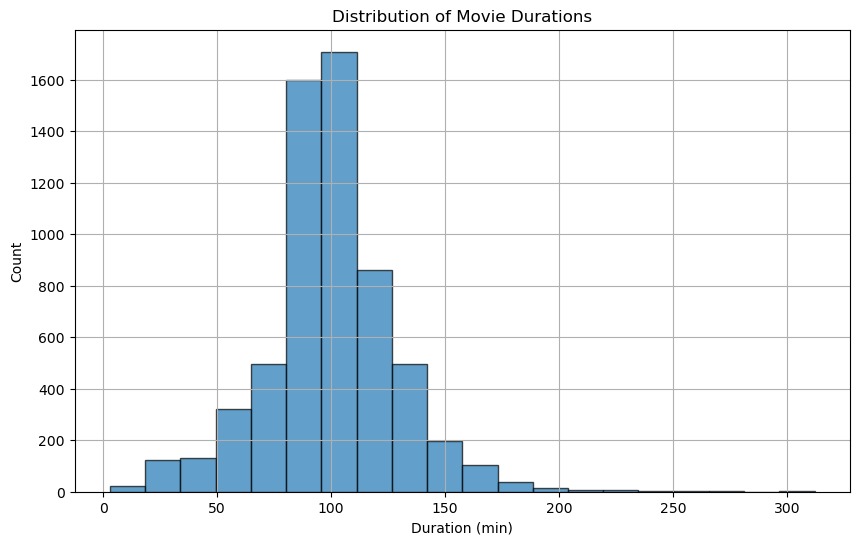

In [36]:
# Extract the movie durations without 'missing' values
movie_durations = df[(df['type'] == 'Movie') & (df['duration'] != 'missing')]['duration']

# Convert the durations to numeric values (remove 'min' suffix)
movie_durations = movie_durations.str.replace(' min', '').astype(int)

# Calculate summary statistics
min_duration = movie_durations.min()
max_duration = movie_durations.max()
mean_duration = movie_durations.mean()
median_duration = movie_durations.median()

# Print the summary statistics
print("Duration Summary Statistics:")
print("Minimum duration: {} min".format(min_duration))
print("Maximum duration: {} min".format(max_duration))
print("Mean duration: {:.2f} min".format(mean_duration))
print("Median duration: {:.2f} min".format(median_duration))

# Create a histogram of movie durations
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(movie_durations, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()

**Observations**

- The average movie length is around 100 minutes.
- And median is 98 minutes.
- Density of duration not really variant, we can see this from median and mean values, they are close to each other. We can say, around 100 min ideal for audience.

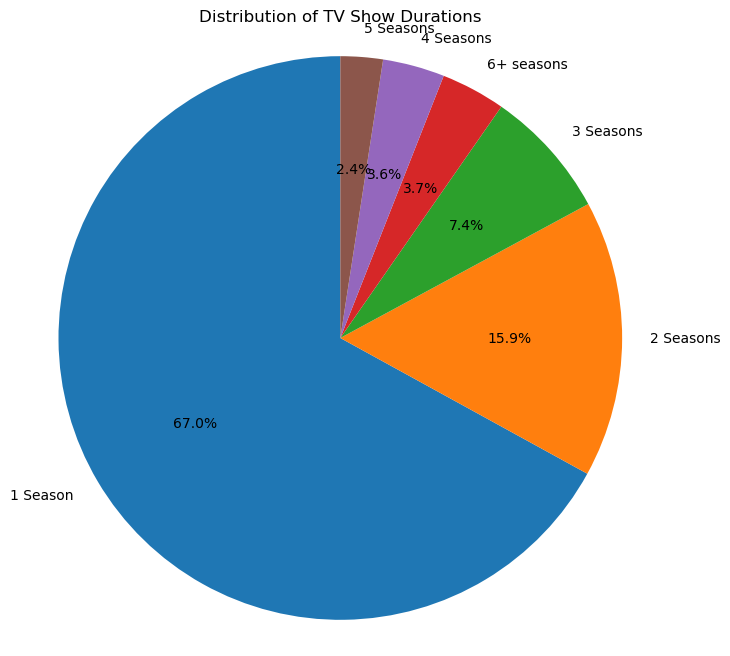

In [37]:
# Filter TV show durations without 'missing' values
tv_show_durations = df[(df['type'] == 'TV Show') & (df['duration'] != 'missing')]['duration']

# Combine durations after 6 seasons into a single category
tv_show_durations = tv_show_durations.apply(lambda x: '6+ seasons' if int(x.split(' ')[0]) >= 6 else x)

# Count the occurrences of each duration
duration_counts = tv_show_durations.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Show Durations')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

**Observations**

- 67% of tv shows are 1 season.
- 2 seasons tv shows are 15.9% and 3 seasons tv shows are 7.4% and keeps decreasing.

## Insights and Recommendations
### Insights  

- Netflix content is mature-audience dominant (TV-MA, TV-14, R ratings)
- Platform positioning: adult-focused entertainment
- Average movie length ≈ 100 mins → clear viewer preference 
- Content is mostly post-2010 releases → modern content focus 
- Top producer countries: US, India, UK, Japan, South Korea 
- Strong presence of international & non-English content
- Family/kids content is limited compared to mature content

### Recommendations 

- Invest more in crime, thriller, drama, mature series
- Expand kids & family content for household growth
- Produce movies in 90–110 min format
- Scale local-language originals in emerging markets
- Build regional content hubs (Africa, LATAM, SEA, Middle East)
- Localize genres by country preference
- Balance portfolio: mature + family + regional
- Use local content for subscriber growth
- Use family content for retention
- Use regional content for global expansion
